In [ ]:
import nltk
from os import listdir
from os.path import isfile, join
import string

In [ ]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [ ]:
print('Training data size:', len(mydata_train['data']))

Training data size: 11314


In [ ]:
len(mydata_train['target'])

11314

In [ ]:
# Printing all the categories
mydata_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# Finding frequency of each category
targets, frequency = np.unique(mydata_train.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

In [ ]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


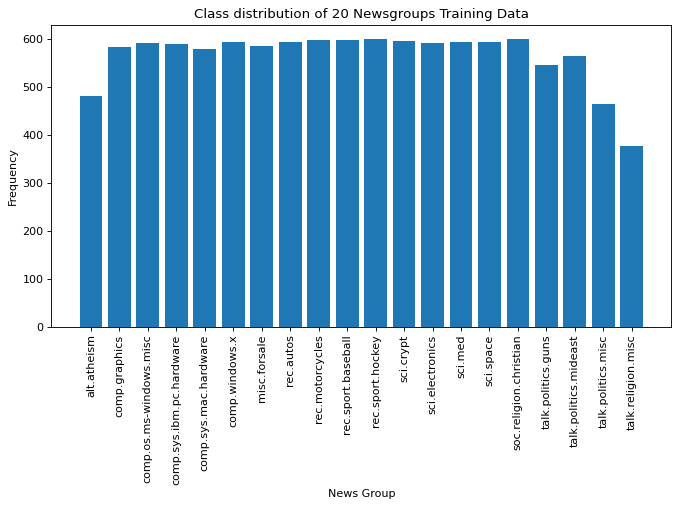

In [ ]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# mydata_test = fetch_20newsgroups(subset='test', shuffle=True)
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [ ]:

print('Testing data size:', len(mydata_test['data']))

Testing data size: 7532


In [ ]:
# Finding frequency of each category
targets_test, frequency_test = np.unique(mydata_test.target, return_counts=True)
targets_test_str = np.array(mydata_test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


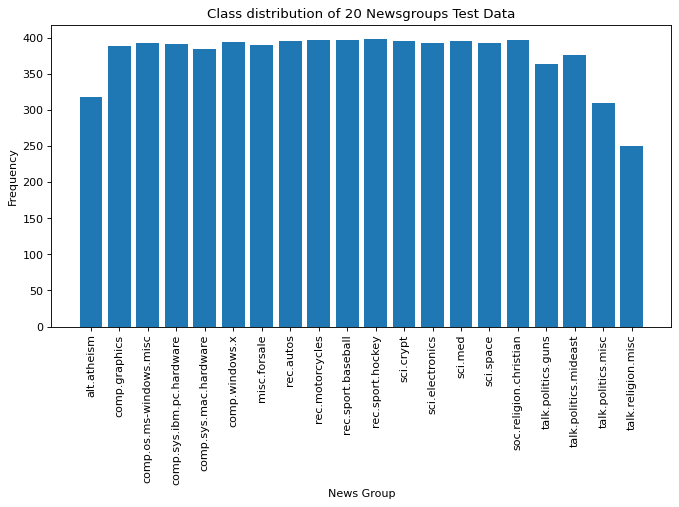

In [ ]:
# Testing data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str,frequency_test)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

data  target
0  I was wondering if anyone out there could enli...       7
1  A fair number of brave souls who upgraded thei...       4
2  well folks, my mac plus finally gave up the gh...       4
3  \nDo you have Weitek's address/phone number?  ...       1
4  From article <C5owCB.n3p@world.std.com>, by to...      14

In [ ]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

data  target
0  i was wondering if anyone out there could enli...       7
1  a fair number of brave souls who upgraded thei...       4
2  well folks  my mac plus finally gave up the gh...       4
3  \ndo you have weitek s address phone number   ...       1
4  from article      world std com   by tombaker ...      14

In [ ]:

# Preparing test data
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

data  target
0  I am a little confused on all of the models of...       7
1  I'm not familiar at all with the format of the...       5
2                                \nIn a word, yes.\n       0
3  \nThey were attacking the Iraqis to drive them...      17
4  \nI've just spent two solid months arguing tha...      19

In [ ]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()

data  target
0  i am a little confused on all of the models of...       7
1  i m not familiar at all with the format of the...       5
2                                \nin a word  yes \n       0
3  \nthey were attacking the iraqis to drive them...      17
4  \ni ve just spent two solid months arguing tha...      19

In [ ]:
# Creating a document-term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(stop_words='english') 
# tfidfV = TfidfVectorizer(ngram_range=(1, 2), binary =True, stop_words='english') 

X_train_tfidfV = tfidfV.fit_transform(mydata_train_df.data) # fit_transform learns the vocab and one-hot encodes 
X_test_tfidfV = tfidfV.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes 

# print the dimensions of the training set (text messages, terms) 
print(X_train_tfidfV.shape)
print(type(X_train_tfidfV))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
X_train_tfidfV_df = pd.DataFrame(X_train_tfidfV.todense())
X_train_tfidfV_df.columns = sorted(tfidfV.vocabulary_)
X_train_tfidfV_df.head()

aa  aaa  aaaaaaaaaaaa  ...  zzzzzzt  ³ation   ýé
0  0.0  0.0           0.0  ...      0.0     0.0  0.0
1  0.0  0.0           0.0  ...      0.0     0.0  0.0
2  0.0  0.0           0.0  ...      0.0     0.0  0.0
3  0.0  0.0           0.0  ...      0.0     0.0  0.0
4  0.0  0.0           0.0  ...      0.0     0.0  0.0

[5 rows x 67822 columns]

In [ ]:
%%time
# Use a Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB() 

# Train the model 
y_train = mydata_train_df.target
mnb.fit(X_train_tfidfV, y_train)

CPU times: user 71.5 ms, sys: 75.9 ms, total: 147 ms
Wall time: 152 ms


In [ ]:
# Take the model that was trained on the X_train_tfidfV data and apply it to the X_test_tfidfV data 
y_pred_tfidfV_mnb = mnb.predict(X_test_tfidfV) 
y_pred_tfidfV_mnb # The output is all of the predictions

array([ 7,  1, 15, ...,  9,  3, 15])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_test = mydata_test_df.target
print(accuracy_score(y_test, y_pred_tfidfV_mnb))
print(classification_report(y_test, y_pred_tfidfV_mnb))

0.6751194901752523
              precision    recall  f1-score   support

           0       0.77      0.19      0.31       319
           1       0.66      0.68      0.67       389
           2       0.67      0.60      0.63       394
           3       0.56      0.73      0.63       392
           4       0.75      0.64      0.69       385
           5       0.80      0.76      0.78       395
           6       0.80      0.75      0.77       390
           7       0.84      0.71      0.77       396
           8       0.85      0.73      0.79       398
           9       0.92      0.81      0.86       397
          10       0.57      0.94      0.71       399
          11       0.59      0.80      0.68       396
          12       0.69      0.52      0.59       393
          13       0.88      0.76      0.81       396
          14       0.78      0.75      0.76       394
          15       0.38      0.92      0.54       398
          16       0.57      0.72      0.64       364
        